# Setup python libraries

In [8]:
import numpy as np
import matplotlib.pyplot as plt

Download a catalogue from https://archive.stsci.edu/prepds/acsggct/

In [12]:
data=np.genfromtxt("hlsp_acsggct_hst_acs-wfc_ngc0104_r.rdviq.cal.adj.zpt.bz2",names=True,unpack=True)

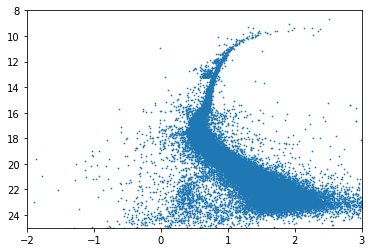

In [13]:
plt.scatter(data['VIvega'],data['Ivega'],s=0.5)
plt.xlim(-2,3)
plt.ylim(25,8)
plt.show()

In [27]:
run ./paintisochrone.py history1M.data colmag.BT-Settl.all.Ours-Castelli.VegaM-0.50.txt paintedhistory1M.data

In [22]:
pdata=np.genfromtxt("paintedhistory1M.data",names=True,skip_header=1,unpack=True)

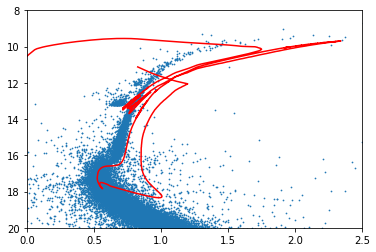

In [29]:
plt.scatter(data['VIvega'],data['Ivega'],s=0.5)
plt.plot(pdata['F606W']-pdata['F814W'],pdata['F814W']+13.3,c='r')
plt.xlim(0,2.5)
plt.ylim(20,8)
plt.show()

In [42]:
run ./paintisochrone.py history09M.data colmag.BT-Settl.all.Ours-Castelli.VegaM-0.50.txt paintedhistory09M.data

In [46]:
pdata9=np.genfromtxt("paintedhistory09M.data",names=True,skip_header=1,unpack=True)
pdata=np.genfromtxt("paintedhistory1M.data",names=True,skip_header=1,unpack=True)

# The Whole CMD

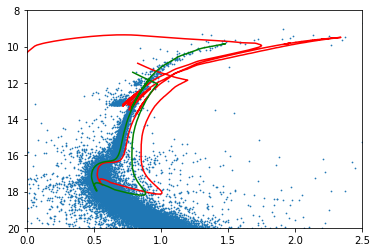

In [53]:
plt.scatter(data['VIvega'],data['Ivega'],s=0.5)
plt.plot(pdata['F606W']-pdata['F814W'],pdata['F814W']+13.1,c='r')
plt.plot(pdata9['F606W']-pdata9['F814W']+0.03,pdata9['F814W']+13.5,c='g')
# the whole CMD
plt.xlim(0.0,2.5)
plt.ylim(20,8)
plt.show()

# Highlight Red Clump and Red Bump

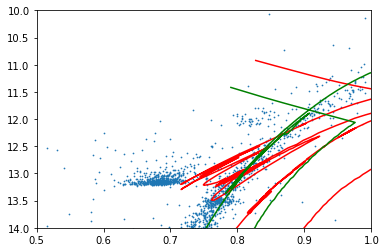

In [54]:
plt.scatter(data['VIvega'],data['Ivega'],s=0.5)
plt.plot(pdata['F606W']-pdata['F814W'],pdata['F814W']+13.1,c='r')
plt.plot(pdata9['F606W']-pdata9['F814W']+0.03,pdata9['F814W']+13.5,c='g')
plt.xlim(0.5,1)
plt.ylim(14,10)
plt.show()

# Highlight red-giant branch

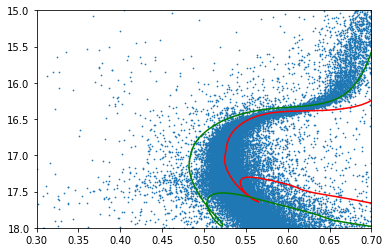

In [52]:
plt.scatter(data['VIvega'],data['Ivega'],s=0.5)
plt.plot(pdata['F606W']-pdata['F814W'],pdata['F814W']+13.1,c='r')
plt.plot(pdata9['F606W']-pdata9['F814W']+0.03,pdata9['F814W']+13.5,c='g')
plt.xlim(0.5,1)
plt.ylim(19,10)
plt.show()

# Highlight Sub-Giant Branch and Turn-Off

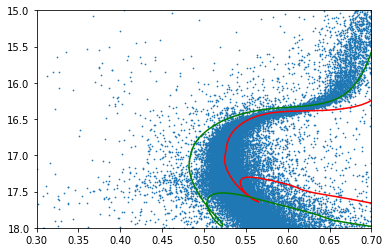

In [52]:
plt.scatter(data['VIvega'],data['Ivega'],s=0.5)
plt.plot(pdata['F606W']-pdata['F814W'],pdata['F814W']+13.1,c='r')
plt.plot(pdata9['F606W']-pdata9['F814W']+0.03,pdata9['F814W']+13.5,c='g')
# Highlight Sub-Giant Branch and Turn-Off
plt.xlim(0.3,0.7)
plt.ylim(18,15)
plt.show()

In [34]:
print(pdata['star_mass'][-1])

0.653780086339
